## Общее описание:

Вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый.

Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.


## Описание данных
**5_task_1**:

- `id` – id клиента в эксперименте
- `group` – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)
- `events` – сколько блюд суммарно было заказано за период


**5_task_2**:

- `id` – id клиента в эксперименте
- `segment` – сегмент (high/low)
- `group` – вид кнопки (control – старая версия, test – новая версия)
- `events` – сколько блюд суммарно было заказано за период


### План

<b><u>Первая задача</u>: проверить гипотезу о влиянии формата фотографий блюд на кол-во заказов этих блюд в приложении:</b> 

1. Подготовка к работе. Импорт необходимых библиотек и загрузка данных c результатами теста по формату фотографий
<br><br>   
2. Изучение данных
<br><br> 
3. Проверка дисперсий внутри групп на гомогенность
<br><br> 
4. Проверка данных на нормальность распределения
<br><br> 
5. Выбор и проведение стат. теста
<br><br> 
6. Проведение апостериорного теста при наличии стат. значимых различий в трех выборках. Формулирование выводов
<br><br>

<b><u>Вторая задача</u>: проверить гипотезу о влиянии формата кнопки оформления заказа, с разбивкой по сегменту клиента:</b>

1. Загрузка данных c результатами теста по формату кнопок и сегментирования пользователей
<br><br> 
2. Изучение данных: визуализация распределения заказов, подсчет некоторых описательных статистик в тесте и в контроле
<br><br> 
3. Проведение теста и применения критерия Тьюки
<br><br> 
4. Визуализация результатов теста и вывод о целесообразности внедрения нового формата кнопки

<hr style='border: 1px solid'>

## Первая задача: проверить гипотезу о влиянии формата фотографий блюд на кол-во заказов этих блюд в приложении

## 1. Импорт библиотек и загрузка данных с тестом трех форматов фотографий блюд

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
# Подготавливаем общие настройки для графиков

sns.set(
rc={
    'figure.figsize':(46,15)
},
font_scale=2
)

In [3]:
#  Загружаем и считываем данные c результатами теста по фотографиям

df_photo_test = pd.read_csv('../5_task_1.csv')

In [4]:
df_photo_test.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [5]:
# Смотрим размер данных

df_photo_test.shape

(30000, 3)

<hr style='border: 1px solid'>

## 2. Изучение данных 

<b>Посмотрим, какой формат фотографий блюд предварительно является наилучшим среди трех выборок</b>

In [14]:
OUTDATED_IGNORE=1

In [15]:
# Находим средние заказов в каждой из групп

groups_mean = df_photo_test.groupby('group') \
.agg({'events':'mean'}) \
.reset_index() 

In [16]:
groups_mean

,group,events
0,A,29.5796
1,B,37.6136
2,C,27.4703


<b><u>Предварительно</u>, судя по данным трех выборок, блюда с квадратными фотографиями пользуются в среднем большей популярностью, чем остальные.</b>

<hr style='border: 1px solid'>

## 3. Проверяем, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) 

<b>Для того, чтобы понять, какой тест применить - классический дисперсионный анализ или ранговый дисперсионный анализ Краскела-Уоллиса, необходимо проверить данные на гомогенность дисперсий и нормальность распределения.
<br><br>
Для проверки гомогенности будем использовать метод levene из библиотеки stats.
<br><br>
Фильтруем df и создаем на его основе три новых с каждой из групп
</b>

In [13]:
group_A = df_photo_test.query('group == "A"').events

In [9]:
group_B = df_photo_test.query('group == "B"').events

In [10]:
group_C = df_photo_test.query('group == "C"').events

In [11]:
stats.levene(group_A, group_B, group_C, center = 'mean')

LeveneResult(statistic=2.22744039161356, pvalue=0.10782184379785464)

<b>Посколкьу p-value > 0.05 (5%), мы не можем отклонить нулевую гипотезу о том, что дисперсии гомогенны.</b>

<hr style='border: 1px solid'>

## 4. Проверяем, что данные распределены нормально

In [11]:
# Поскольку размер выборок превышает 5000, используем тест Д'Агостино-Пирсона и графики QQ для визуализации

stats.normaltest(group_A)

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)

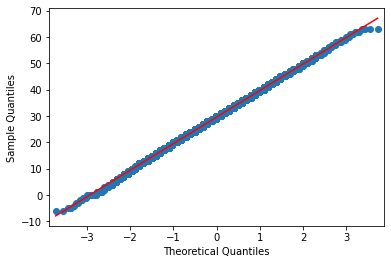

In [12]:
sm.qqplot(group_A, line='r')
plt.show()

In [13]:
stats.normaltest(group_B)

NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)

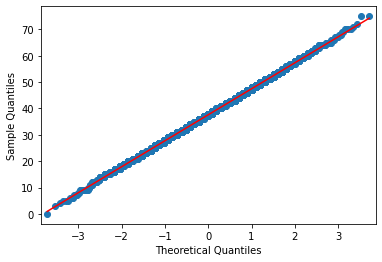

In [14]:
sm.qqplot(group_B, line='r')
plt.show()

In [15]:
stats.normaltest(group_C)

NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)

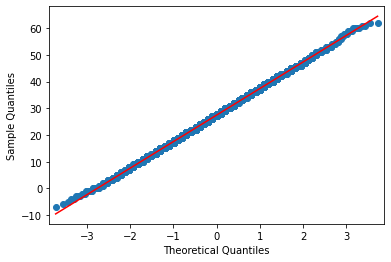

In [16]:
sm.qqplot(group_C, line='r')
plt.show()

<b>По совокупности результатов тестов на нормальность распределения выборок и графика qqplot мы не можем отклонить нулевую гипотезу о том, что данные нормально распределены. Делаем вывод о нормальности распределений во всех трех группах. </b>

<hr style='border: 1px solid'>

## 5. Выбираем и проводим однофакторный дисперсионный анализ

<b>Поскольку данные в трех группах нормально распределены и обладают свойством гомогенности дисперсий, будем проводить <u>однофакторный дисперсионный анализ</u>.
<br><br>
В качестве зависимой переменной выступает кол-во заказов блюд, в качестве фактора - формат фотографии.
<br><br>
Гипотезы: 

H0:
– ни одно из выборочных средних не отличается от другого 
<br><br>
H1:
– хотя бы одно выборочное среднее отличается от других (есть различия как минимум между двумя группами)
<br><br>
Устанавливаем уровень значимости - 0.05 (5%)
</b>

In [17]:
# Используем функцию f_oneway из библиотеки stats 

stats.f_oneway(group_A, group_B, group_C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

<b><u>Вывод</u>: Как видим, поскольку p-value < 0.05, среднее заказов блюд хотя одной из групп значимо отличается от средних в других группах
<br><br>
Однако это не говорит нам какие именно группы различаются. Для этого нам необходимо провести апостериорный тест.
</b>

<hr style='border: 1px solid'>

## 6. Используем критерий Тьюки и определяем, между какими группами есть статистически значимые различия.

In [21]:
# Используем функцию pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
endog=df['events'],
groups=df['group'],
alpha=0.05    
)

In [22]:
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


<b> Вывод: между всеми средними значениями всех групп есть стат. различия. Поскольку среднее заказов блюд с <u>квадратными фотографиями</u> является наибольшим в трех выборках, будем использовать их в приложении.</b>

<hr style='border: 1px solid'>

## Вторая задача: проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента

## 1. Загружаем данные

In [33]:
# Читаем данные

df_button = pd.read_csv('./5_task_2.csv')

In [34]:
df_button.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


<hr style='border: 1px solid'>

## 2. Изучаем данные

### Смотрим на типы данных, наличие дубликатов-строк

In [34]:
df_button.dtypes

id           int64
group       object
segment     object
events     float64
dtype: object

In [35]:
df_button.shape

(100000, 4)

In [36]:
# Смотрим, какие у нас есть сегменты пользователей

df_button.segment.unique()

array(['high', 'low'], dtype=object)

### Визуализируем распределение events для контрольной и тестовой групп

In [25]:
# Визуализируем распределение events для контрольной группы

control_group = df_button.query('group == "control"')

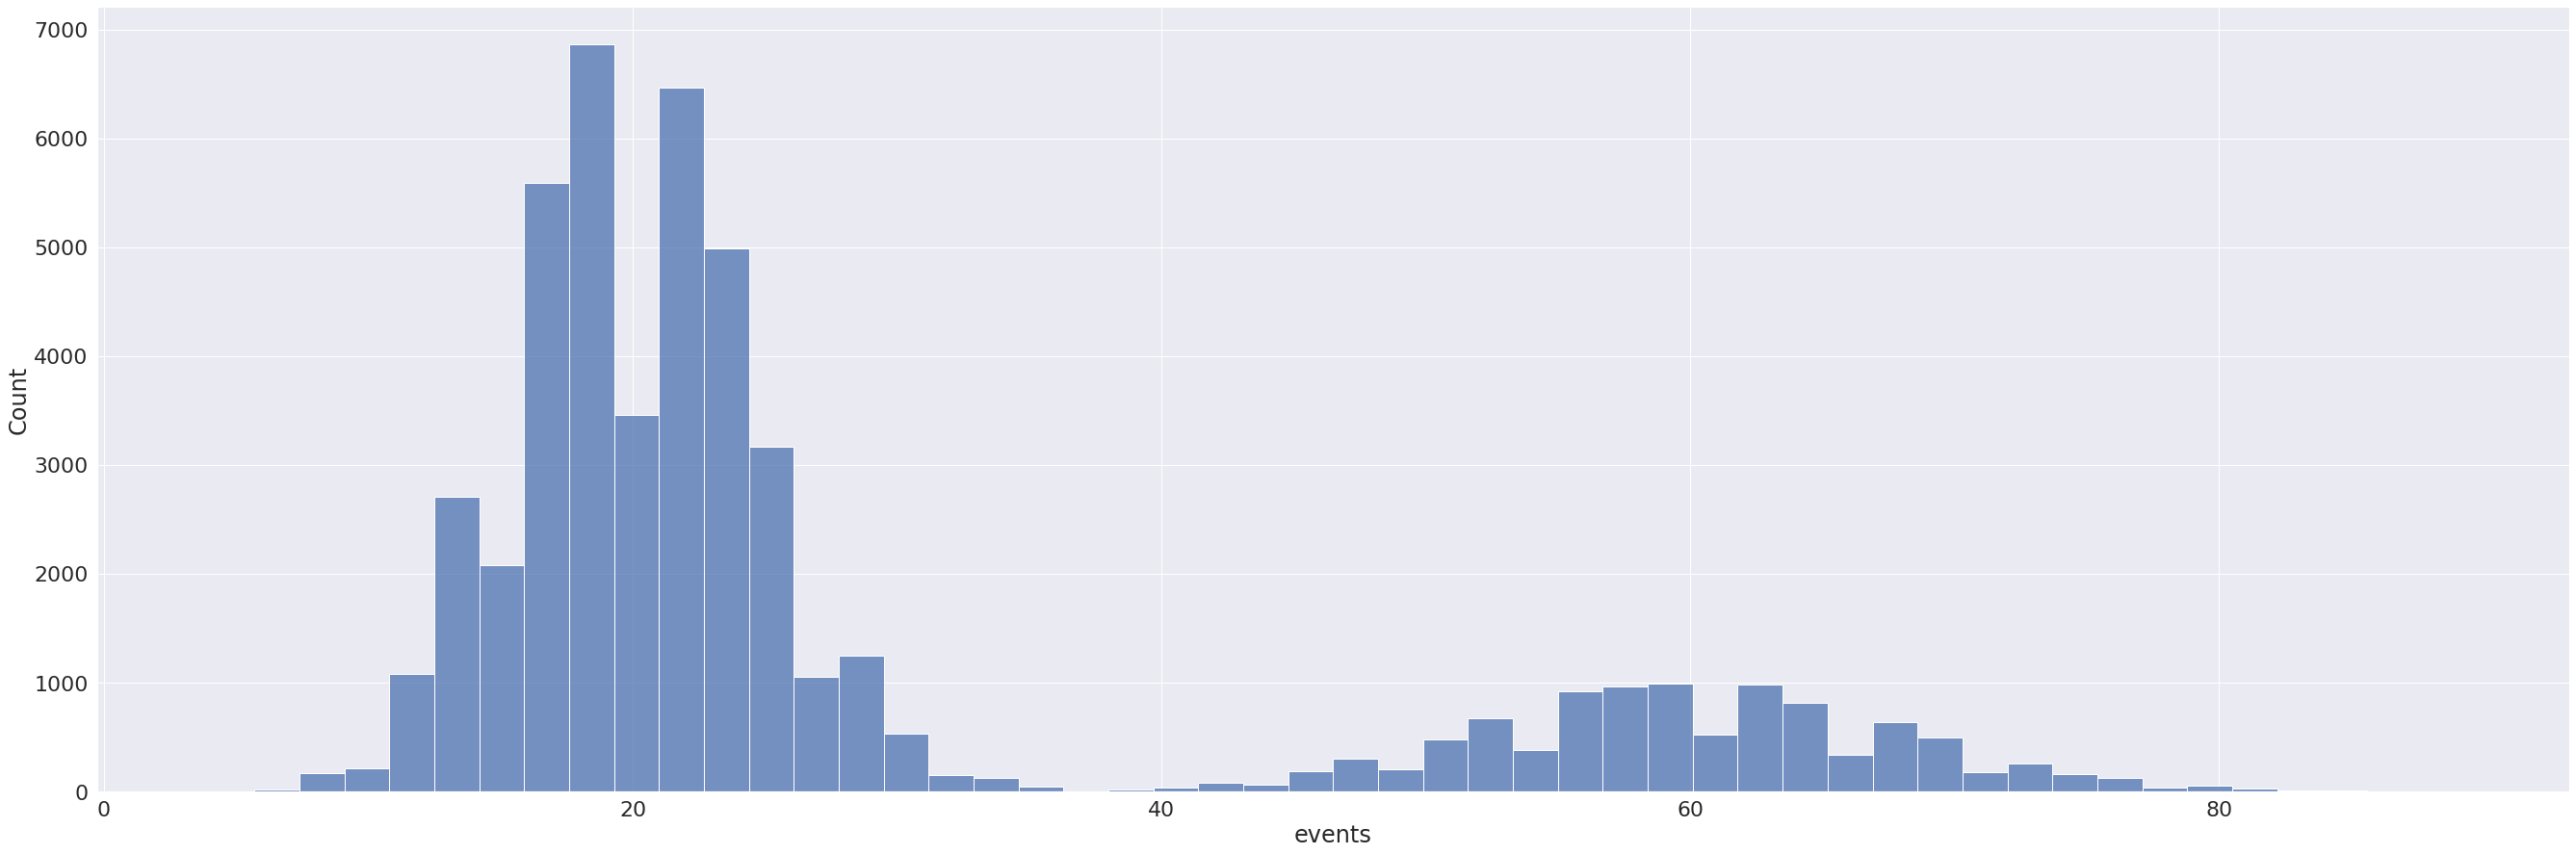

In [32]:
sns.histplot(control_group.events, bins=50)
plt.show()

In [27]:
# Визуализируем распределение events для тестовой группы

test_group = df_button.query('group == "test"')

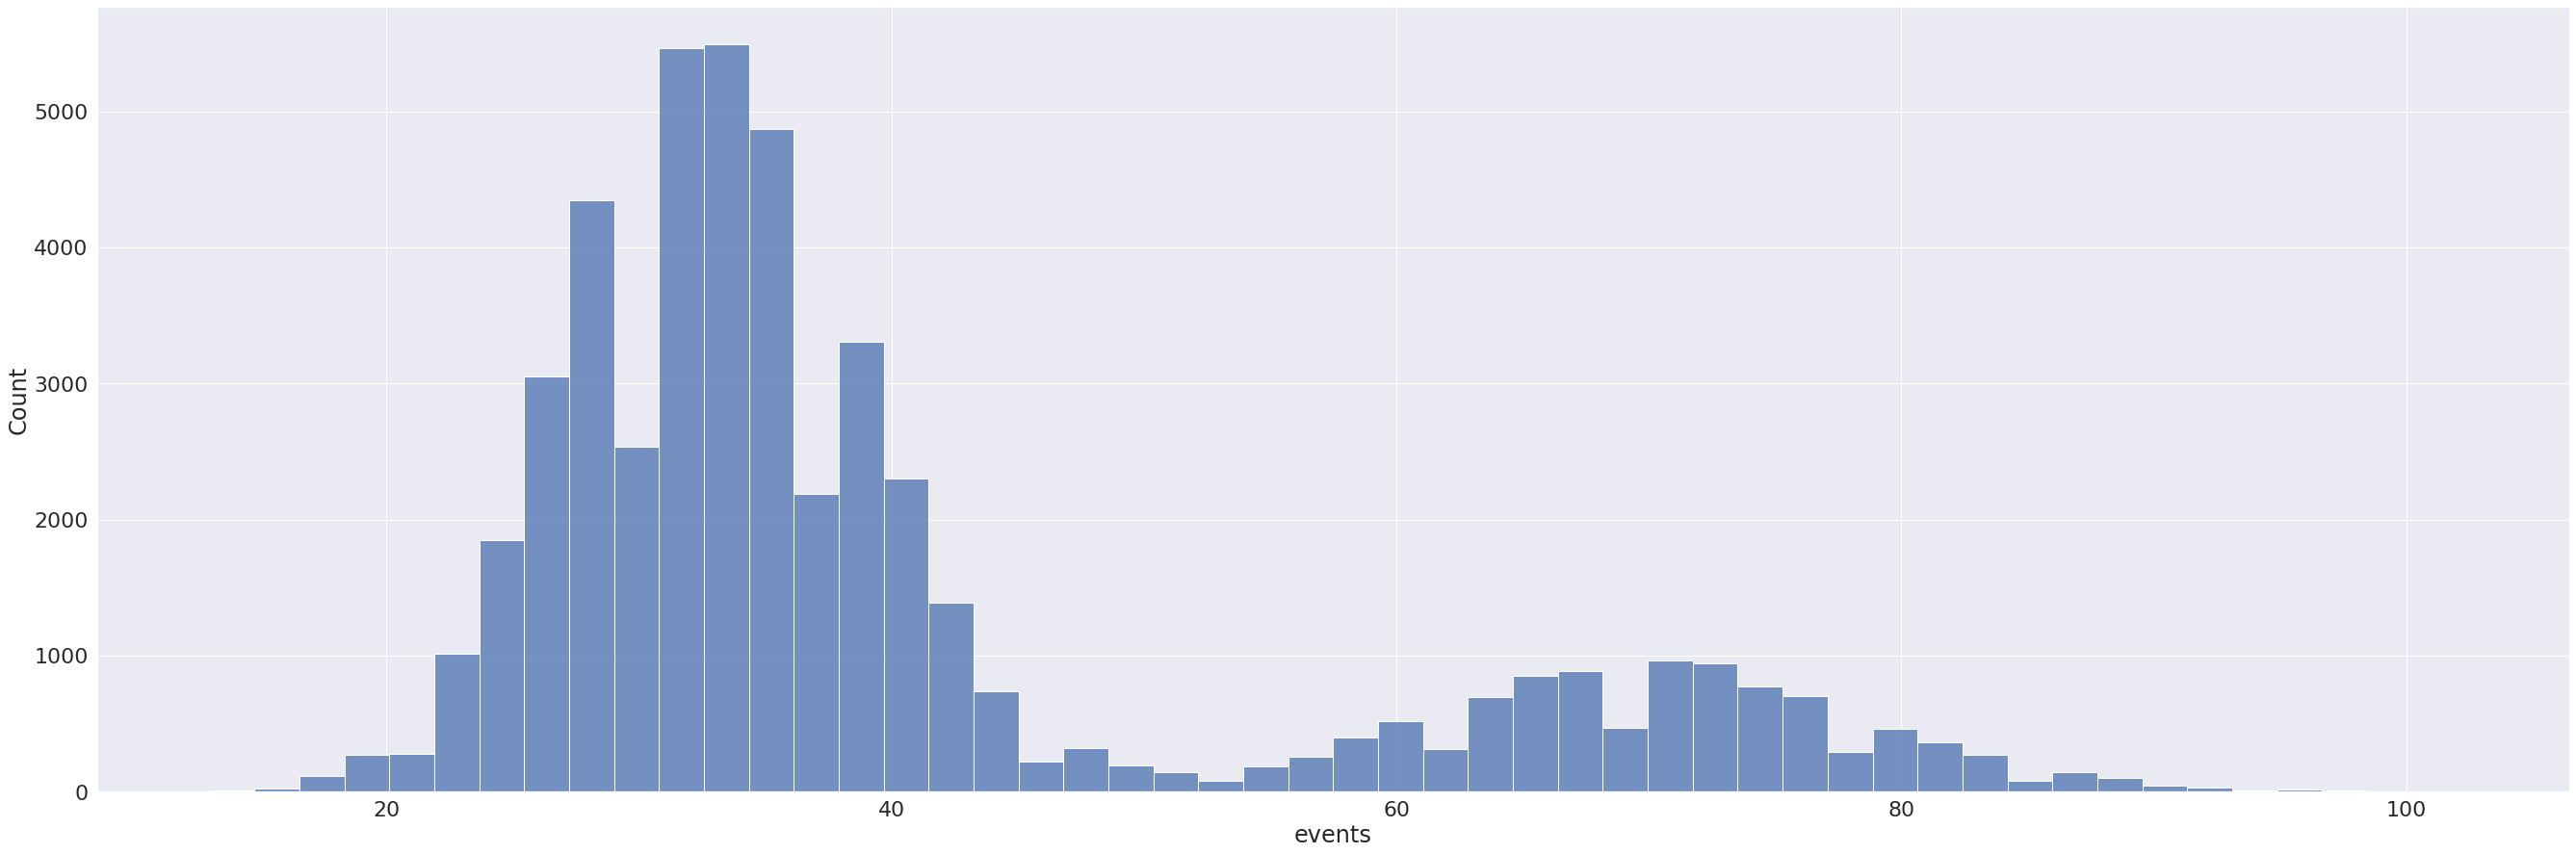

In [33]:
sns.histplot(test_group.events, bins=50)
plt.show()

<b>Как видно по гистограммам, предварительно, можно сделать вывод об успешности нового формата кнопки</b>

### Считаем среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя

In [38]:
grouped_data = df_button.groupby(['group','segment']) \
.agg({'events':'describe'})

In [39]:
grouped_data

events                                                    
                   count       mean       std   min   25%   50%   75%    max
group   segment                                                             
control high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

<b>Предварительно можно сделать вывод о том, что наибольшей популярностью пользуются блюда с новой кнопкой заказа, среди high сегмента</b>

<hr style='border: 1px solid'>

## 3. Проводим  многофакторный дисперсионный анализ, а затем используем критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

<b>
<br><br>
В качестве зависимой переменной выступает кол-во заказов блюд, в качестве факторов - формат кнопки заказа и сегмент пользователя.
<br><br>
Формулируем три нулевые и три альтернативные гипотезы: 
<br><br>
H0:
– формат кнопки заказа не влияет на кол-во заказов
<br><br>
H1:
– формат кнопки стат. значимо влияет на кол-во заказов
<br><br>
H0:
– сегмент пользователей не влияет на кол-во заказов
<br><br>
H1:
– сегмент пользователей влияет на кол-во заказов
<br><br>
H0:
– Нет взаимодействия между фактором формата кнопки и сегмента пользователя
<br><br>
H1:
– взаимодействие двух факторов есть
<br><br>
Устанавливаем уровень значимости - 0.05 (5%)

</b>

In [37]:
# Проводим многофакторный дисперсионный тест с помощью библиотеки pingouin и функции anova

pg.anova(data=df_button, dv='events', between=['group','segment'])


,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


<b>
Видим, что p-value меньше 0.05, теперь надо определить между какими группами есть стат. значимые различия.
<br><br>
Для последующих сравнений между группами нужно соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в pairwise_tukey</b>

In [35]:
df_button['combination'] = df_button['segment'] + '/' + df_button['group']

In [36]:
df_button

,id,group,segment,events,combination
0,83440,test,high,78.0,high/test
1,96723,test,high,71.0,high/test
2,68719,test,high,80.0,high/test
3,50399,test,high,80.0,high/test
4,95613,test,high,78.0,high/test
...,...,...,...,...,...
99995,60695,control,low,15.0,low/control
99996,5934,control,low,16.0,low/control
99997,30046,control,low,22.0,low/control
99998,26474,control,low,21.0,low/control


In [38]:
# Используем критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия

tukey = pairwise_tukeyhsd(
endog=df_button['events'],
groups=df_button['combination'],
alpha=0.05    
)

In [39]:
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
high/control   high/test   9.9677 0.001   9.7551  10.1803   True
high/control low/control -39.9392 0.001 -40.1073 -39.7711   True
high/control    low/test -26.9449 0.001  -27.113 -26.7768   True
   high/test low/control -49.9069 0.001  -50.075 -49.7388   True
   high/test    low/test -36.9126 0.001 -37.0807 -36.7445   True
 low/control    low/test  12.9944 0.001   12.888  13.1007   True
----------------------------------------------------------------


<b> Вывод: между всеми группами есть стат. различия.
Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой.
Разница между control/high и test/high составила около 10 в пользу второй.
Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13
</b>

## 4. Визуализируем результаты теста

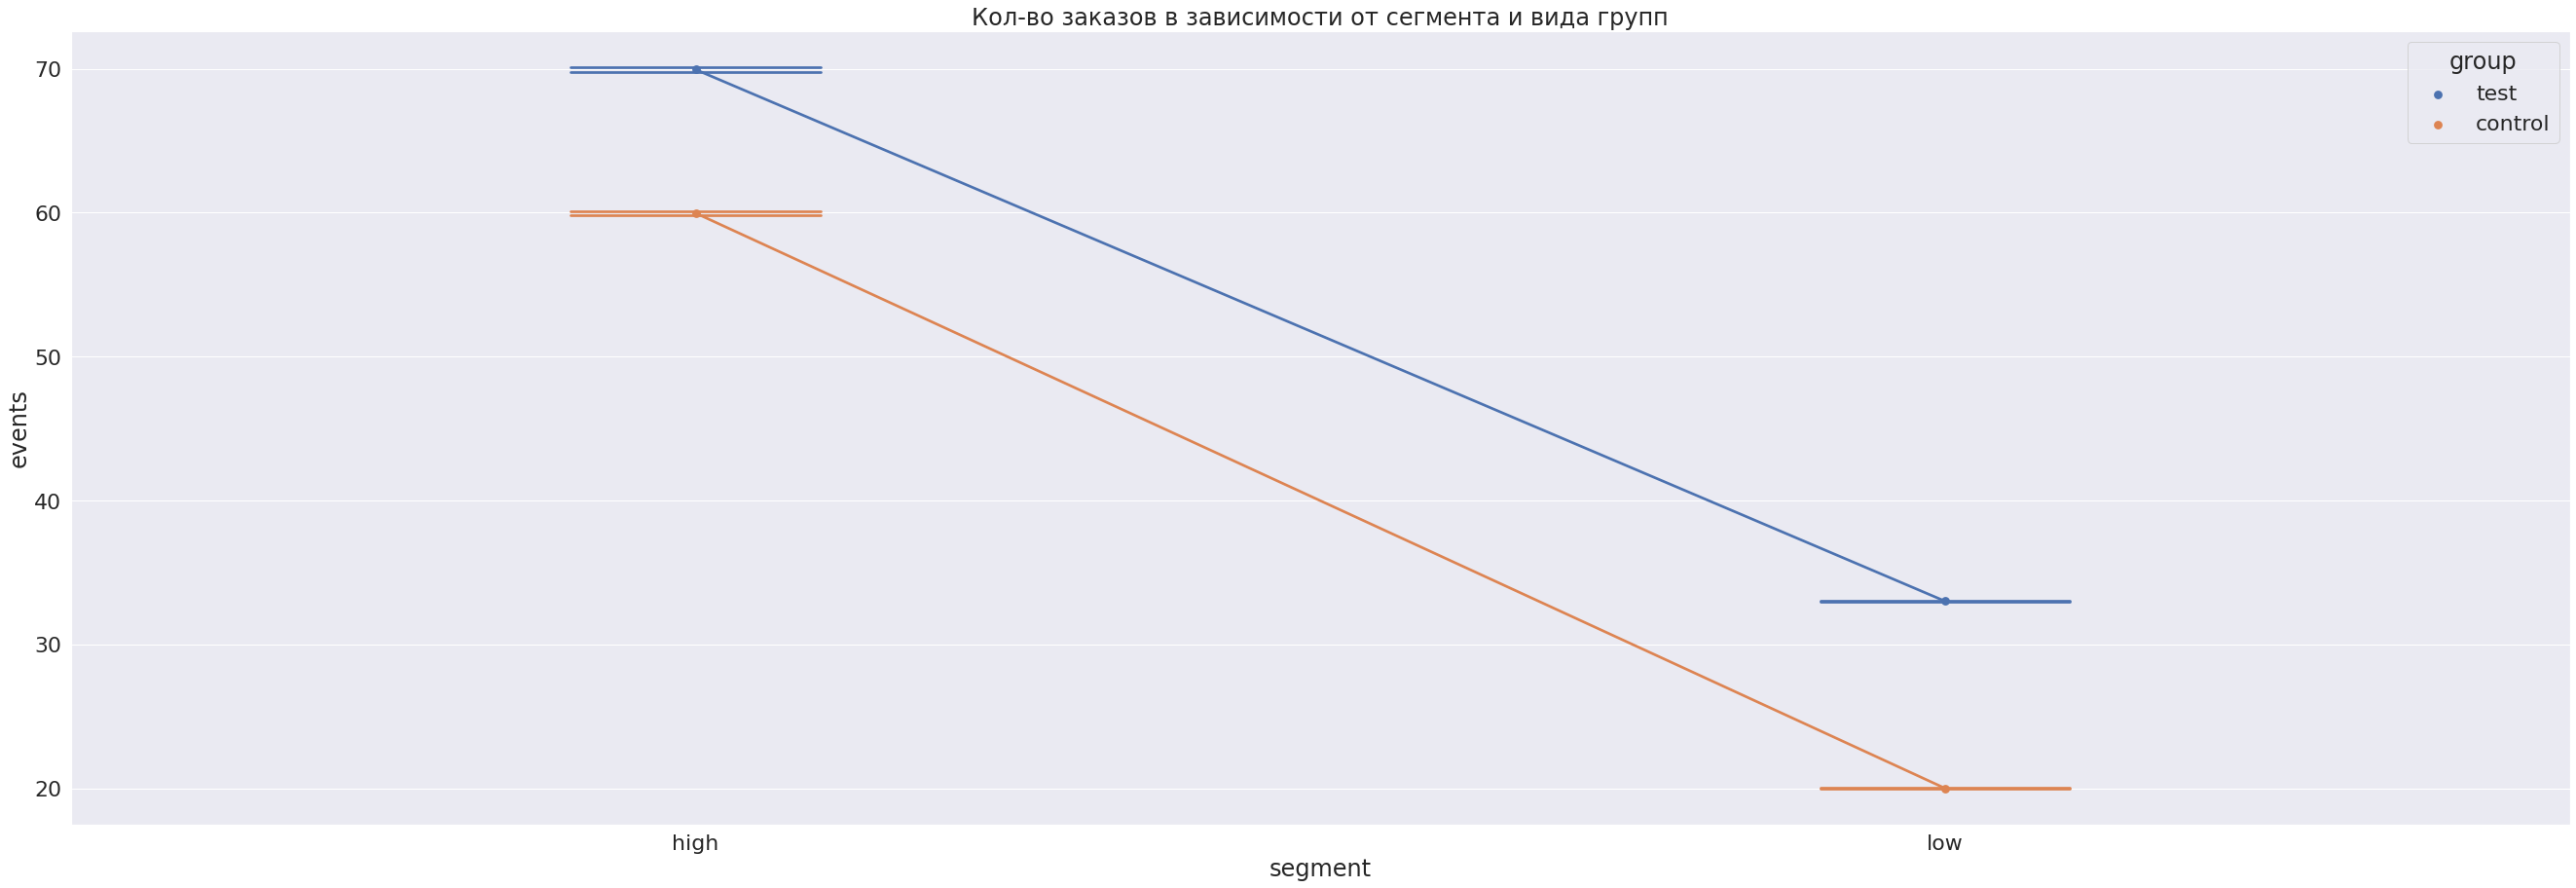

In [44]:
sns.pointplot(data=df_button, y='events',x='segment',hue='group',capsize=.2)
plt.title('Кол-во заказов в зависимости от сегмента и вида групп')
plt.show()

<b><u>Вывод:</u> Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО (несмотря на результаты графика, большее значение для нас имеют результаты теста).
 Судя по графику, для всех сегментов среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: 
выкатываем новую версию.</b>